# Starting Off

You've been tasked with predicting the starting salary for alumni of Flatiron school.  The data set you have is not that in-depth.  All you have is the program the student went to (Data Science or Software Engineering), their level of education (HS, Bachelors, Grad) and their salary.  

How would you try to predict the salary of the students?



# Regression with Decision Trees

Decision Trees are also capable of performing regression tasks.  Let's build a retression tree using Scikit-Learn and see how it works

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('whitegrid')

In [9]:
# Create a random data Quadratic training set with some noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

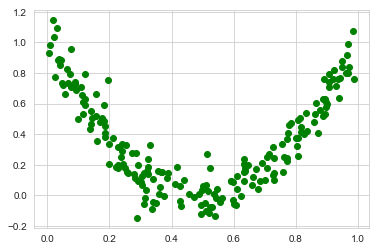

In [6]:
plt.plot(X, y, 'o', color='g');


Now let's fit two trees on with a max depth of 2 and 3.

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

This tree looks very similar to the classification tree you built earlier. The main differ‐
ence is that instead of predicting a class in each node, it predicts a value.

True

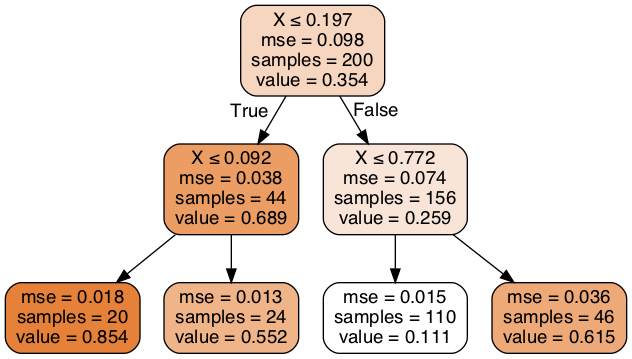

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_reg1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['X'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_reg1.png')
Image(graph.create_png())

For example, suppose you want to make a prediction for a new instance with x1 = 0.6. You traverse
the tree starting at the root, and you eventually reach the leaf node that predicts
value=0.111. 

This prediction is simply the average target value of the 110 training
instances associated to this leaf node. This prediction results in a Mean Squared Error
(MSE) equal to 0.0151 over these 110 instances.

True

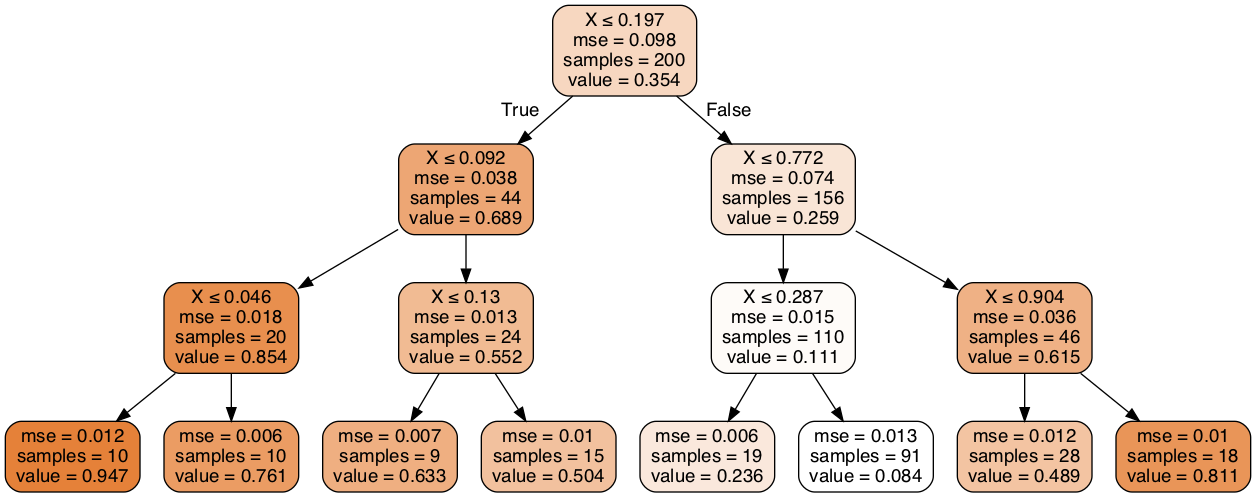

In [12]:
dot_data = StringIO()
export_graphviz(tree_reg2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['X'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_reg2.png')
Image(graph.create_png())

### Question:  

Determin the predicted value for the followin Xs:
    
1. 0.15 --> 0.504
2. 0.87 --> 0.489
2. 0.3 --> 0.084



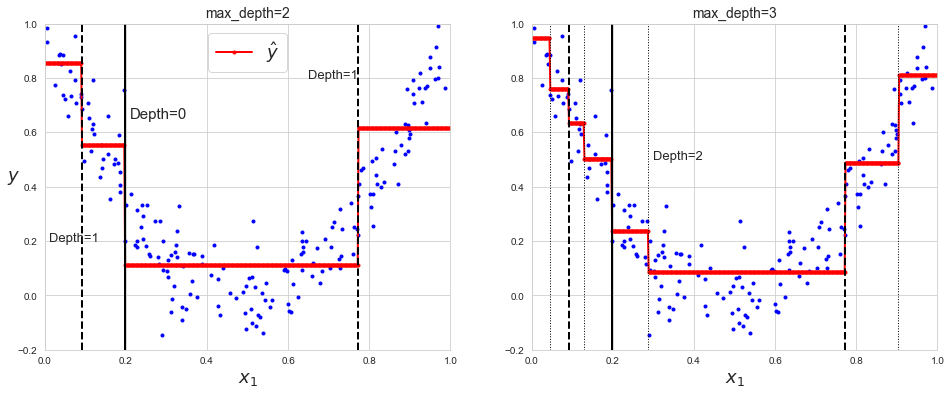

In [15]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(16, 6))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show();

This model’s predictions for each model are represented by the red lines. The splits in the trees create regions shown by the vertical lines.  
 
Notice how the predicted value for each region is always the average target value of the instances in that
region. The algorithm splits each region in a way that makes most training instances
as close as possible to that predicted value.

The CART algorithm works mostly the same way as earlier, except that instead of try‐
ing to split the training set in a way that minimizes impurity, it now tries to split the
training set in a way that minimizes the MSE. The quation below shows the cost function
that the algorithm tries to minimize

<img src='./images/dt_reg_cost.png' />

# Restricting the trees

Now lets run the model without a restriction on max tree dept and see how it fits the tree.

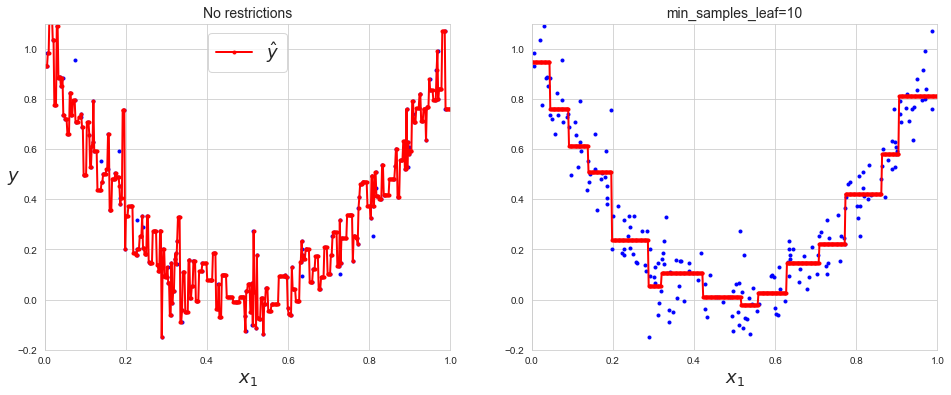

In [17]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

# save_fig("tree_regression_regularization_plot")
plt.show();

In [ ]:
DecisionTreeRegressor()

In [21]:
matplotlib.rcParams.update({'font.size': 14})
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
df = pd.read_csv('kc_house_data.csv',index_col='id')
df['yr_old']=2017 - df['yr_built']

target = df.price
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade',
       'sqft_basement', 'yr_old']]
features_cols = features.columns

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 10) (17290,)
(4323, 10) (4323,)


In [24]:

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_reg_housing.png')
Image(graph.create_png())

# Using Gridsearch to determine the best parameters

1. Determine the hyperparameters you want to tune

2. Instantiate the estimator you want to use.

3. Create your GridSearch object with the appropriate parameters

4. Fit the Gridsearch object and identify the best model  

5. import a metric to use to evaluate yoru test  data.  https://scikit-learn.org/stable/modules/model_evaluation.html

In [53]:
#create a list of parameters to check 
parameter_list={'max_depth': range(3,10,1), 
                'min_samples_leaf': range(1,10,1),
                'min_weight_fraction_leaf': [0.0, 0.005, 0.01]}

In [54]:
#create our estimator
reg_tree=DecisionTreeRegressor(random_state=42)

In [56]:
# Import Grid search
from sklearn.model_selection import GridSearchCV

#create the instance of GridSearchCV
grid_tree = GridSearchCV(reg_tree, parameter_list,  cv=5, scoring='neg_mean_squared_error')

In [50]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [58]:
#fit the Gridsearch to our data
grid_tree.fit(X_train, y_train)

# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 10), 'min_samples_leaf': range(1, 10), 'min_weight_fraction_leaf': [0.0, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

-43269712730.22464
{'max_depth': 8, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.0}
DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')


In [71]:
from sklearn.metrics import mean_squared_error

#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Testing Metric:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Testing Metric: 240739.03796909685
